In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sachin_df = pd.read_excel('sachin.xlsx')

In [3]:
sachin_df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending,Match Number,Result
0,11,92,-,-,0,-,6,lbw,1,v Sri Lanka,Chandigarh,1990-11-23,Test # 1156,Won
1,50,158,118,6,0,42.37,4,caught,1,v England,Kolkata,1993-01-29,Test # 1211,Won
2,9,17,19,2,0,47.36,4,not out,4,v England,Kolkata,1993-01-29,Test # 1211,Won
3,165,361,296,24,1,55.74,4,caught,1,v England,Chennai,1993-02-11,Test # 1213,Won
4,78,285,213,10,0,36.61,4,lbw,2,v England,Mumbai,1993-02-19,Test # 1214,Won


In [4]:
sachin_df.shape

(347, 14)

In [5]:
sachin_df = sachin_df[sachin_df['BF'] != '-']
sachin_df = sachin_df[sachin_df['Runs'] != 'DNB']

In [6]:
sachin_df.shape

(328, 14)

In [7]:
X = sachin_df['BF'].values
y = sachin_df['Runs'].values

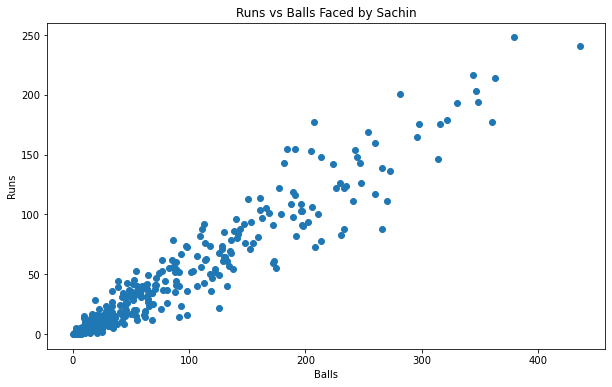

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Runs vs Balls Faced by Sachin')
plt.show()

In [8]:
# Normalization - MinMaxScaler
# Standardization - StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:
X = X.reshape(-1,1)

In [11]:
y = y.reshape(-1,1)

In [12]:
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [13]:
y_scaled = minmax.fit_transform(y)

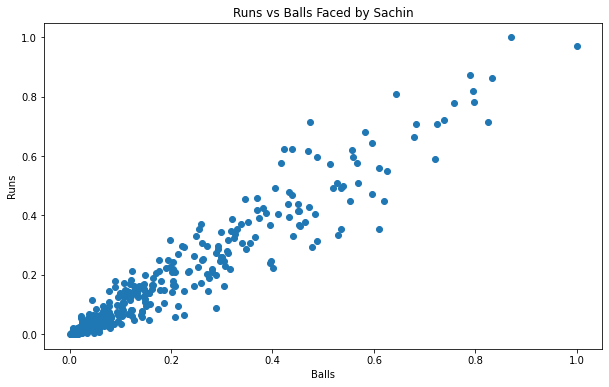

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled,y_scaled)
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Runs vs Balls Faced by Sachin')
plt.show()

In [16]:
X[:5]

array([[118],
       [19],
       [296],
       [213],
       [114]], dtype=object)

In [17]:
X_scaled[:5]

array([[0.2706422 ],
       [0.04357798],
       [0.67889908],
       [0.48853211],
       [0.26146789]])

In [29]:
n = len(X_scaled)

def cost_function(x,y,slope,inter):
    y_pred = slope * x + inter
    mse = (1/n) * np.sum((y_pred - y) ** 2)
    return mse

In [30]:
def gradientDescent(x,y,epochs,alpha):
    slope, inter = 0,0
    costHistory = []
    for i in range(epochs):
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_slope = (2/n) * np.dot(x.T, loss)
        grad_inter = (2/n) * np.sum(loss)
        slope = slope - grad_slope * alpha
        inter = inter - grad_inter * alpha
        costHistory.append(cost_function(x,y,slope,inter))
    
    return slope, inter, costHistory

In [63]:
epochs = 3000
alpha = 0.02
slope, inter, cost = gradientDescent(X_scaled, y_scaled, epochs, alpha)

In [64]:
slope, inter

(array([[0.96749964]]), -0.003487368599566913)

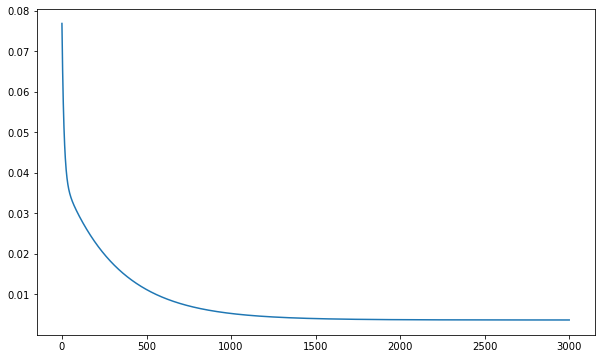

In [65]:
plt.figure(figsize=(10,6))
plt.plot(cost)
plt.show()

In [66]:
predictions = []
for i in range(n):
    y_pred = slope[0][0] * X_scaled[i] + inter
    predictions.append(y_pred)

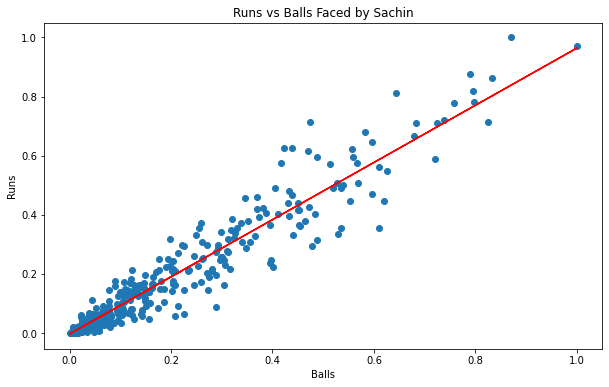

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled,y_scaled)
plt.plot(X_scaled, predictions, 'r')
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Runs vs Balls Faced by Sachin')
plt.show()